# Yahoo Finance 下載台積電股價資料


In [71]:
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 台積電股價資料

In [72]:
TSMC = yf.Ticker("2330.TW")
TSMC.info


{'address1': 'Hsinchu Science Park',
 'address2': 'No. 8, Li-Hsin Road 6',
 'city': 'Hsinchu City',
 'zip': '300096',
 'country': 'Taiwan',
 'phone': '886 3 563 6688',
 'fax': '886 3 563 7000',
 'website': 'https://www.tsmc.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited, together with its subsidiaries, manufactures, packages, tests, and sells integrated circuits and other semiconductor devices in Taiwan, China, Europe, the Middle East, Africa, Japan, the United States, and internationally. It provides a range of wafer fabrication processes, including processes to manufacture complementary metal- oxide-semiconductor (CMOS) logic, mixed-signal, radio frequency, embedded memory, bipolar CMOS mixed-signal, and others. The company also offers customer and engineering support se

In [73]:
tsmc = yf.download('2330.TW',start='2016-01-01',end='2021-01-01')
tsmc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,,
2016-01-04,107.623642,139.5,143.5,139.0,142.5,39169000
2016-01-05,106.466377,138.0,140.0,137.0,139.0,46381000
2016-01-06,104.537666,135.5,138.0,135.0,138.0,53617000
2016-01-07,102.608925,133.0,135.0,130.5,134.5,62539000
2016-01-08,103.380409,134.0,135.0,132.0,132.0,50123000
...,...,...,...,...,...,...
2020-12-25,473.202179,511.0,515.0,510.0,514.0,12327895
2020-12-28,476.906281,515.0,515.0,509.0,512.0,19087382


In [74]:
tsmc = yf.download('2330.TW',period='5y', interval='1d')
avg_values = (tsmc['High'] + tsmc['Low']) / 2
avg_values.to_csv('tsmc_avg_prices.csv')
avg_values


[*********************100%***********************]  1 of 1 completed


Ticker,2330.TW
Date,
2019-12-17,340.00
2019-12-18,343.25
2019-12-19,338.50
2019-12-20,330.75
2019-12-23,331.75
...,...
2024-12-11,1052.50
2024-12-12,1060.00
2024-12-13,1062.50


In [75]:
avg_values = pd.read_csv('tsmc_avg_prices.csv')
avg_values



,Date,2330.TW
0,2019-12-17,340.00
1,2019-12-18,343.25
2,2019-12-19,338.50
3,2019-12-20,330.75
4,2019-12-23,331.75
...,...,...
1211,2024-12-11,1052.50
1212,2024-12-12,1060.00
1213,2024-12-13,1062.50
1214,2024-12-16,1080.00


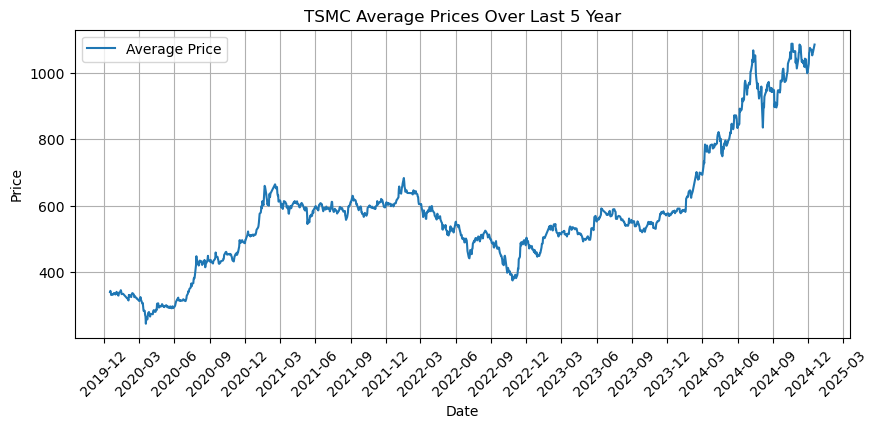

In [76]:
# 繪製折線圖
plt.figure(figsize=(10, 4))
# 將Datetime轉換為datetime格式以便更好地處理時間軸
avg_values['Date'] = pd.to_datetime(avg_values['Date'])
# 設定x軸的刻度為每3個月一個標籤
plt.plot(avg_values['Date'], avg_values['2330.TW'], label='Average Price')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.title('TSMC Average Prices Over Last 5 Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [77]:
#SEQ_LEN = 60
#FUTURE_PERIOD_PREDICT = 1 #day, how far into the future are we trying to predict?
#RATIO_TO_PREDICT = "avg"
# 設定參數
SEQ_LEN = 60  # 序列長度
FUTURE_PERIOD_PREDICT = 3  # 預測未來天數
RATIO_TO_PREDICT = "2330.TW"  # 要預測的欄位

In [78]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [79]:
avg_values['future'] = avg_values[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
avg_values['target'] = list(map(classify, avg_values[RATIO_TO_PREDICT], avg_values['future']))
avg_values

,Date,2330.TW,future,target
0,2019-12-17,340.00,330.75,0
1,2019-12-18,343.25,331.75,0
2,2019-12-19,338.50,333.25,0
3,2019-12-20,330.75,332.75,1
4,2019-12-23,331.75,332.75,1
...,...,...,...,...
1211,2024-12-11,1052.50,1080.00,1
1212,2024-12-12,1060.00,1085.00,1
1213,2024-12-13,1062.50,NaN,0
1214,2024-12-16,1080.00,NaN,0


(912, 3)
(121, 3)
(121, 3)


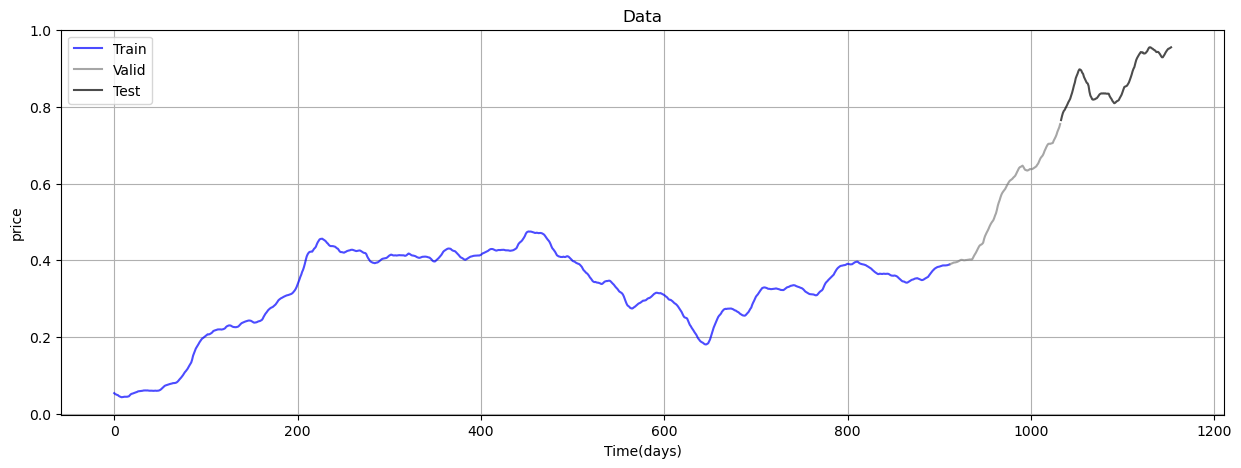

總數據量: 1216
訓練集大小: 912
驗證集大小: 121
測試集大小: 121


In [80]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt


# 轉二維
all_data = avg_values[RATIO_TO_PREDICT].values.reshape(-1, 1)

# 使用MinMaxScaler進行縮放 0-1
scaler = MinMaxScaler()
all_data_scaled = scaler.fit_transform(all_data)

# 應用EMA平滑處理到整個數據集
def apply_ema(data, gamma=0.1):
    ema = 0.0
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        ema = gamma * data[i] + (1 - gamma) * ema
        smoothed_data[i] = ema
    return smoothed_data

all_data_smoothed = apply_ema(all_data_scaled)

# 計算分割點
total_len = len(all_data_smoothed)
train_len = int(0.8 * total_len)
valid_len = int(0.1 * total_len)
test_len = total_len - train_len - valid_len

# 創建序列數據的函數
def create_sequences(data, seq_length, future_period):
    X, y = [], []
    for i in range(len(data) - seq_length - future_period + 1):
        X.append(data[i:(i + seq_length)]) 
        y.append(data[i + seq_length:(i + seq_length + future_period)]) 
    return np.array(X), np.array(y)

# 創建完整的序列數據
X_all, y_all = create_sequences(all_data_smoothed, SEQ_LEN, FUTURE_PERIOD_PREDICT)

# 分割序列數據
train_end = train_len - SEQ_LEN
val_end = train_len + valid_len - SEQ_LEN

X_train = X_all[:train_end]
y_train = y_all[:train_end]

X_valid = X_all[train_end:val_end]
y_valid = y_all[train_end:val_end]

X_test = X_all[val_end:]
y_test = y_all[val_end:]

# 重塑數據
if len(X_train) > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
if len(X_valid) > 0:
    X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
if len(X_test) > 0:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], ))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], ))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], ))
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

# 畫出預測圖表
plt.figure(figsize=(15, 5))

# 繪製訓練數據
if len(y_train) > 0:
    plt.plot(range(y_train.shape[0]), y_train[:, 0], 
             color='blue', label='Train', alpha=0.7)

# 繪製驗證數據
if len(y_valid) > 0:
    plt.plot(range(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), 
             y_valid[:, 0], color='gray', label='Valid', alpha=0.7)

# 繪製測試數據
if len(y_test) > 0:
    plt.plot(range(y_train.shape[0] + y_valid.shape[0], 
                   y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]),
             y_test[:, 0], color='black', label='Test', alpha=0.7)

plt.title('Data')
plt.xlabel('Time(days)')
plt.ylabel('price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 打印數據集大小
print(f"總數據量: {len(all_data_smoothed)}")
print(f"訓練集大小: {len(y_train)}")
print(f"驗證集大小: {len(y_valid)}")
print(f"測試集大小: {len(y_test)}")

In [81]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
print(y_train[0])
print(y_valid[0])
print(y_test[0])



(912, 60, 1)
(121, 60, 1)
(121, 60, 1)
(912, 3)
(121, 3)
(121, 3)
[0.05315892 0.05089669 0.0496908 ]
[0.38966701 0.39087226 0.39171981]
[0.76560418 0.77582111 0.78418623]


In [82]:
import torch
import torch.nn as nn
import math
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm # 用於Pytorch 訓練進度條

In [83]:
# 定義Dataset
class MyDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Transformer模型定義
class Transformer(nn.Module):
    def __init__(self, input_dim=1, d_model=128, nhead=4, num_layers=4, output_dim=3, max_seq_length=60, pos_encoding_type=1):
        super().__init__()
        
        self.input_proj = nn.Linear(input_dim, d_model)
        self.pos_encoding_type = pos_encoding_type
        
        # 可學習的位置編碼
        self.learnable_pe = nn.Parameter(torch.zeros(1, max_seq_length, d_model))
        nn.init.xavier_uniform_(self.learnable_pe)
        
        # 正弦餘弦位置編碼
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('sincos_pe', pe.unsqueeze(0))
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model*4,
            dropout=0.1,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        self.output_proj = nn.Linear(d_model, output_dim)
        
    def forward(self, x):
        x = self.input_proj(x)
        
        if self.pos_encoding_type == 0:
            x = x + self.learnable_pe[:, :x.size(1)]
        else:
            x = x + self.sincos_pe[:, :x.size(1)]
            
        output = self.transformer_encoder(x)
        output = output[:, -1, :]  # 使用最後一個時間步的輸出
        output = self.output_proj(output)
        return output

In [84]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    pbar = tqdm(train_loader, desc='Training')
    for batch_x, batch_y in pbar:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    return total_loss / len(train_loader)

def validate(model, valid_loader, criterion, device):
    model.eval()
    total_loss = 0
    pbar = tqdm(valid_loader, desc='Validating')
    with torch.no_grad():
        for batch_x, batch_y in pbar:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            output = model(batch_x)
            loss = criterion(output, batch_y)
            total_loss += loss.item()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    return total_loss / len(valid_loader)




In [85]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = MyDataset(X_train, y_train)
valid_dataset = MyDataset(X_valid, y_valid)

BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.0001

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

model = Transformer().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)




train_losses = []
valid_losses = []

try:
    for epoch in tqdm(range(EPOCHS), desc='Epochs'):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        valid_loss = validate(model, valid_loader, criterion, device)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        print(f'\nEpoch {epoch+1}/{EPOCHS}:')
        print(f'Train Loss: {train_loss:.4f}')
        print(f'Valid Loss: {valid_loss:.4f}')
except KeyboardInterrupt:
    print('訓練被手動中斷')
finally:
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    # 保存模型權重
    torch.save(model.state_dict(), 'tsmc_transformer_weights.pth')

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 1/100:
Train Loss: 0.0456
Valid Loss: 0.0167


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 2/100:
Train Loss: 0.0165
Valid Loss: 0.0159


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 3/100:
Train Loss: 0.0125
Valid Loss: 0.0076


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 4/100:
Train Loss: 0.0112
Valid Loss: 0.0085


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 5/100:
Train Loss: 0.0101
Valid Loss: 0.0093


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 6/100:
Train Loss: 0.0095
Valid Loss: 0.0052


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 7/100:
Train Loss: 0.0091
Valid Loss: 0.0125


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 8/100:
Train Loss: 0.0083
Valid Loss: 0.0048


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 9/100:
Train Loss: 0.0080
Valid Loss: 0.0049


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 10/100:
Train Loss: 0.0072
Valid Loss: 0.0031


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 11/100:
Train Loss: 0.0069
Valid Loss: 0.0076


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 12/100:
Train Loss: 0.0067
Valid Loss: 0.0104


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 13/100:
Train Loss: 0.0063
Valid Loss: 0.0055


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 14/100:
Train Loss: 0.0057
Valid Loss: 0.0041


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 15/100:
Train Loss: 0.0055
Valid Loss: 0.0043


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 16/100:
Train Loss: 0.0052
Valid Loss: 0.0031


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 17/100:
Train Loss: 0.0048
Valid Loss: 0.0027


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 18/100:
Train Loss: 0.0050
Valid Loss: 0.0044


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 19/100:
Train Loss: 0.0051
Valid Loss: 0.0067


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 20/100:
Train Loss: 0.0053
Valid Loss: 0.0064


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 21/100:
Train Loss: 0.0041
Valid Loss: 0.0060


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 22/100:
Train Loss: 0.0041
Valid Loss: 0.0040


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 23/100:
Train Loss: 0.0038
Valid Loss: 0.0033


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 24/100:
Train Loss: 0.0037
Valid Loss: 0.0032


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 25/100:
Train Loss: 0.0034
Valid Loss: 0.0039


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 26/100:
Train Loss: 0.0034
Valid Loss: 0.0045


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 27/100:
Train Loss: 0.0032
Valid Loss: 0.0039


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 28/100:
Train Loss: 0.0033
Valid Loss: 0.0055


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 29/100:
Train Loss: 0.0032
Valid Loss: 0.0029


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 30/100:
Train Loss: 0.0029
Valid Loss: 0.0048


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 31/100:
Train Loss: 0.0032
Valid Loss: 0.0035


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 32/100:
Train Loss: 0.0028
Valid Loss: 0.0026


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 33/100:
Train Loss: 0.0028
Valid Loss: 0.0026


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 34/100:
Train Loss: 0.0026
Valid Loss: 0.0047


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 35/100:
Train Loss: 0.0027
Valid Loss: 0.0060


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 36/100:
Train Loss: 0.0026
Valid Loss: 0.0039


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 37/100:
Train Loss: 0.0023
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 38/100:
Train Loss: 0.0023
Valid Loss: 0.0029


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 39/100:
Train Loss: 0.0021
Valid Loss: 0.0025


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 40/100:
Train Loss: 0.0020
Valid Loss: 0.0031


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 41/100:
Train Loss: 0.0020
Valid Loss: 0.0026


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 42/100:
Train Loss: 0.0022
Valid Loss: 0.0023


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 43/100:
Train Loss: 0.0019
Valid Loss: 0.0024


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 44/100:
Train Loss: 0.0019
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 45/100:
Train Loss: 0.0017
Valid Loss: 0.0015


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 46/100:
Train Loss: 0.0018
Valid Loss: 0.0014


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 47/100:
Train Loss: 0.0018
Valid Loss: 0.0025


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 48/100:
Train Loss: 0.0017
Valid Loss: 0.0018


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 49/100:
Train Loss: 0.0016
Valid Loss: 0.0024


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 50/100:
Train Loss: 0.0017
Valid Loss: 0.0023


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 51/100:
Train Loss: 0.0016
Valid Loss: 0.0020


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 52/100:
Train Loss: 0.0015
Valid Loss: 0.0019


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 53/100:
Train Loss: 0.0015
Valid Loss: 0.0033


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 54/100:
Train Loss: 0.0015
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 55/100:
Train Loss: 0.0015
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 56/100:
Train Loss: 0.0014
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 57/100:
Train Loss: 0.0013
Valid Loss: 0.0023


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 58/100:
Train Loss: 0.0014
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 59/100:
Train Loss: 0.0013
Valid Loss: 0.0030


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 60/100:
Train Loss: 0.0013
Valid Loss: 0.0011


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 61/100:
Train Loss: 0.0013
Valid Loss: 0.0035


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 62/100:
Train Loss: 0.0015
Valid Loss: 0.0015


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 63/100:
Train Loss: 0.0013
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 64/100:
Train Loss: 0.0012
Valid Loss: 0.0019


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 65/100:
Train Loss: 0.0011
Valid Loss: 0.0020


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 66/100:
Train Loss: 0.0011
Valid Loss: 0.0012


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 67/100:
Train Loss: 0.0011
Valid Loss: 0.0032


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 68/100:
Train Loss: 0.0012
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 69/100:
Train Loss: 0.0011
Valid Loss: 0.0029


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 70/100:
Train Loss: 0.0012
Valid Loss: 0.0018


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 71/100:
Train Loss: 0.0011
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 72/100:
Train Loss: 0.0010
Valid Loss: 0.0016


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 73/100:
Train Loss: 0.0009
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 74/100:
Train Loss: 0.0010
Valid Loss: 0.0008


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 75/100:
Train Loss: 0.0012
Valid Loss: 0.0019


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 76/100:
Train Loss: 0.0010
Valid Loss: 0.0019


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 77/100:
Train Loss: 0.0009
Valid Loss: 0.0015


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 78/100:
Train Loss: 0.0009
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 79/100:
Train Loss: 0.0009
Valid Loss: 0.0022


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 80/100:
Train Loss: 0.0010
Valid Loss: 0.0009


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 81/100:
Train Loss: 0.0009
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 82/100:
Train Loss: 0.0009
Valid Loss: 0.0017


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 83/100:
Train Loss: 0.0009
Valid Loss: 0.0025


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 84/100:
Train Loss: 0.0009
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 85/100:
Train Loss: 0.0009
Valid Loss: 0.0012


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 86/100:
Train Loss: 0.0008
Valid Loss: 0.0014


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 87/100:
Train Loss: 0.0008
Valid Loss: 0.0010


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 88/100:
Train Loss: 0.0009
Valid Loss: 0.0016


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 89/100:
Train Loss: 0.0008
Valid Loss: 0.0011


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 90/100:
Train Loss: 0.0008
Valid Loss: 0.0008


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 91/100:
Train Loss: 0.0008
Valid Loss: 0.0020


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 92/100:
Train Loss: 0.0008
Valid Loss: 0.0021


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 93/100:
Train Loss: 0.0008
Valid Loss: 0.0019


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 94/100:
Train Loss: 0.0008
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 95/100:
Train Loss: 0.0008
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 96/100:
Train Loss: 0.0007
Valid Loss: 0.0016


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 97/100:
Train Loss: 0.0008
Valid Loss: 0.0008


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 98/100:
Train Loss: 0.0007
Valid Loss: 0.0013


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 99/100:
Train Loss: 0.0007
Valid Loss: 0.0012


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 100/100:
Train Loss: 0.0007
Valid Loss: 0.0016


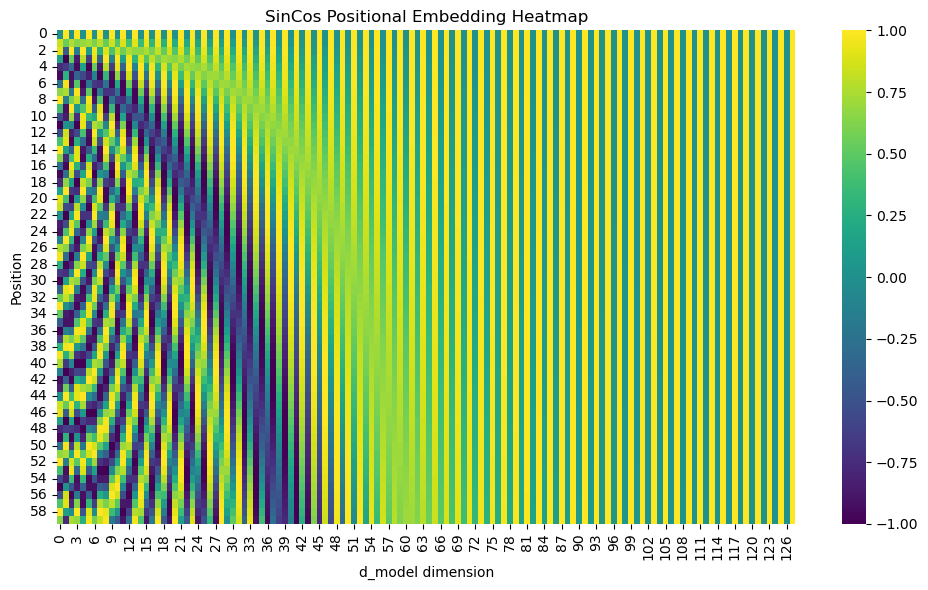

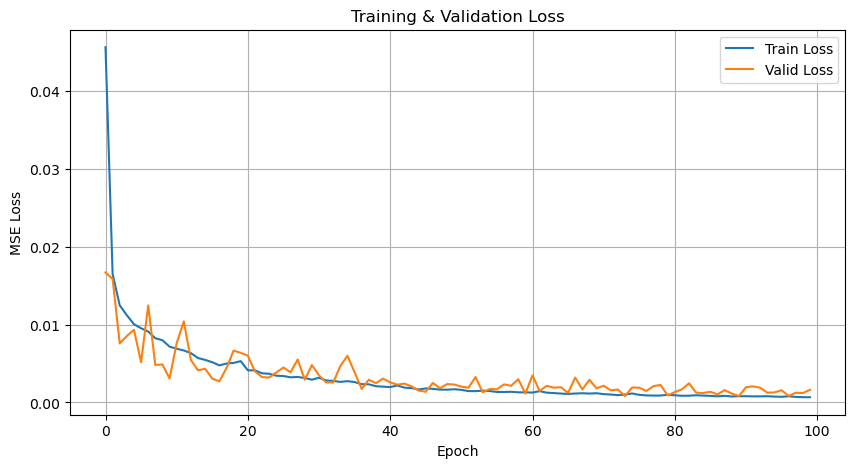

(121, 3)


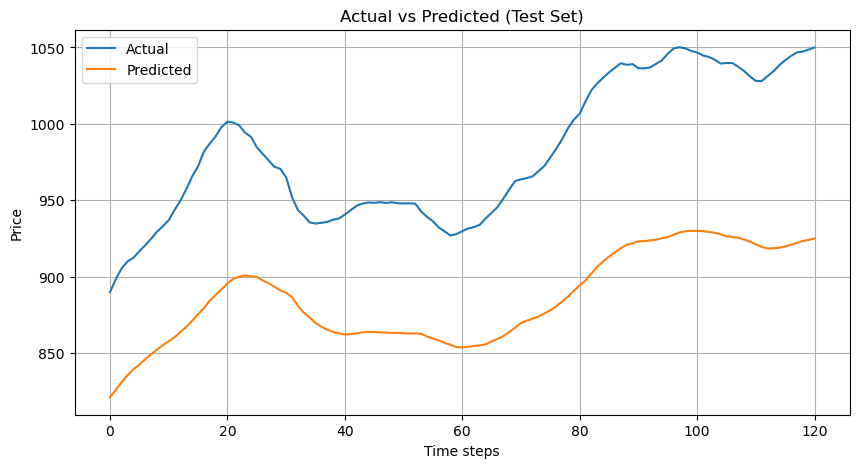

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 載入模型權重
model.load_state_dict(torch.load('tsmc_transformer_weights.pth'))
model.eval()

##############################################
# 1. 繪製位置編碼 (Position Embedding) Heatmap #
##############################################
# 若是 sincos_pe (不可學習的正弦餘弦位置編碼)
if hasattr(model, 'sincos_pe'):
    pe = model.sincos_pe.detach().cpu().numpy()[0]
    plt.figure(figsize=(10,6))
    sns.heatmap(pe, cmap='viridis')
    plt.title('SinCos Positional Embedding Heatmap')
    plt.xlabel('d_model dimension')
    plt.ylabel('Position')
    plt.tight_layout()
    plt.show()


#####################################
# 2. 繪製訓練與驗證的損失曲線 (Loss) #
#####################################
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()


#####################################
# 3. 使用測試集進行預測並可視化結果 #
#####################################
# 將測試資料轉換為張量
# 將測試資料轉換為張量
X_test_tensor = torch.FloatTensor(X_test).to(device)
with torch.no_grad():
    predicted = model(X_test_tensor).cpu().numpy()
    print(predicted.shape)

# predicted為縮放後的預測值，使用scaler inverse轉回原值
predicted = predicted.reshape(-1, 1)  # 移除 :,0 索引
predicted_original = scaler.inverse_transform(predicted)
actual_original = scaler.inverse_transform(y_test.reshape(-1,1))

# 只取每天第一筆資料
daily_indices = range(0, len(actual_original), 3)  # 每3筆取1筆
daily_indices2 = range(0, len(predicted_original), 3)  # 每3筆取1筆
actual_daily = actual_original[daily_indices]
predicted_daily = predicted_original[daily_indices2]

# 繪製預測與實際比較圖
plt.figure(figsize=(10,5))
plt.plot(range(len(actual_daily)), actual_daily, label='Actual')
plt.plot(range(len(predicted_daily)), predicted_daily, label='Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()



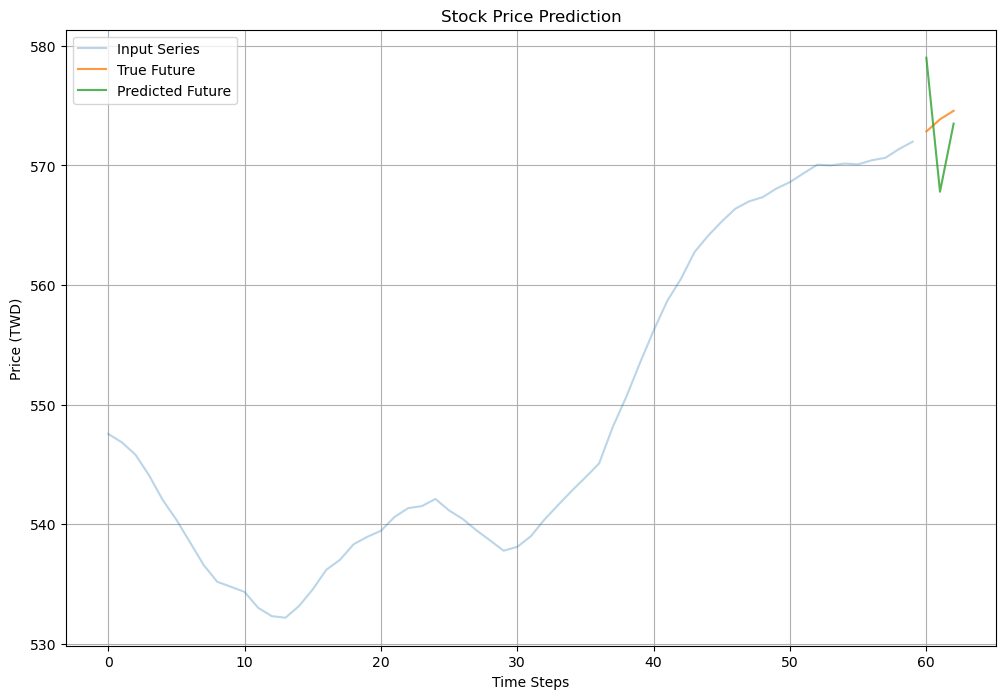

MAE: 4.4313


In [87]:
def plot_series(x_data, y, y_pred):
    plt.figure(figsize=(12, 8))
    # 繪製輸入序列
    plt.plot(range(len(x_data)), x_data, label='Input Series', alpha=0.3)
    
    # 繪製真實值和預測值
    input_len = len(x_data)
    plt.plot(range(input_len, input_len + len(y)), y, 
             label='True Future', alpha=0.8)
    plt.plot(range(input_len, input_len + len(y_pred)), y_pred, 
             label='Predicted Future', alpha=0.8)
    
    plt.legend()
    plt.title('Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Price (TWD)')
    plt.grid(True)
    plt.show()

def show_prediction_with_mae():
    # 獲取一個驗證集樣本
    x, y_true = next(iter(valid_loader))
    x, y_true = x.to(device), y_true.to(device)
    
    # 進行預測
    model.eval()
    with torch.no_grad():
        y_pred = model(x)
    
    # 選擇第一個樣本
    x = x[0].cpu().numpy()
    y_true = y_true[0].cpu().numpy()
    y_pred = y_pred[0].cpu().numpy()
    
    # 反標準化 - MinMaxScaler只需要使用data_min_和data_max_
    x_temp = x[:, 0] * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]  # 取第一列(股價)
    y_true = y_true * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
    y_pred = y_pred * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
    
    # 繪製圖表
    plot_series(x_temp, y_true, y_pred)
    
    # 計算MAE
    mae = np.mean(np.abs(y_pred - y_true))
    print(f'MAE: {mae:.4f}')

# 執行預測和可視化
show_prediction_with_mae()
